## 멤버십 점수화를 통한 멤버십유입률 전처리

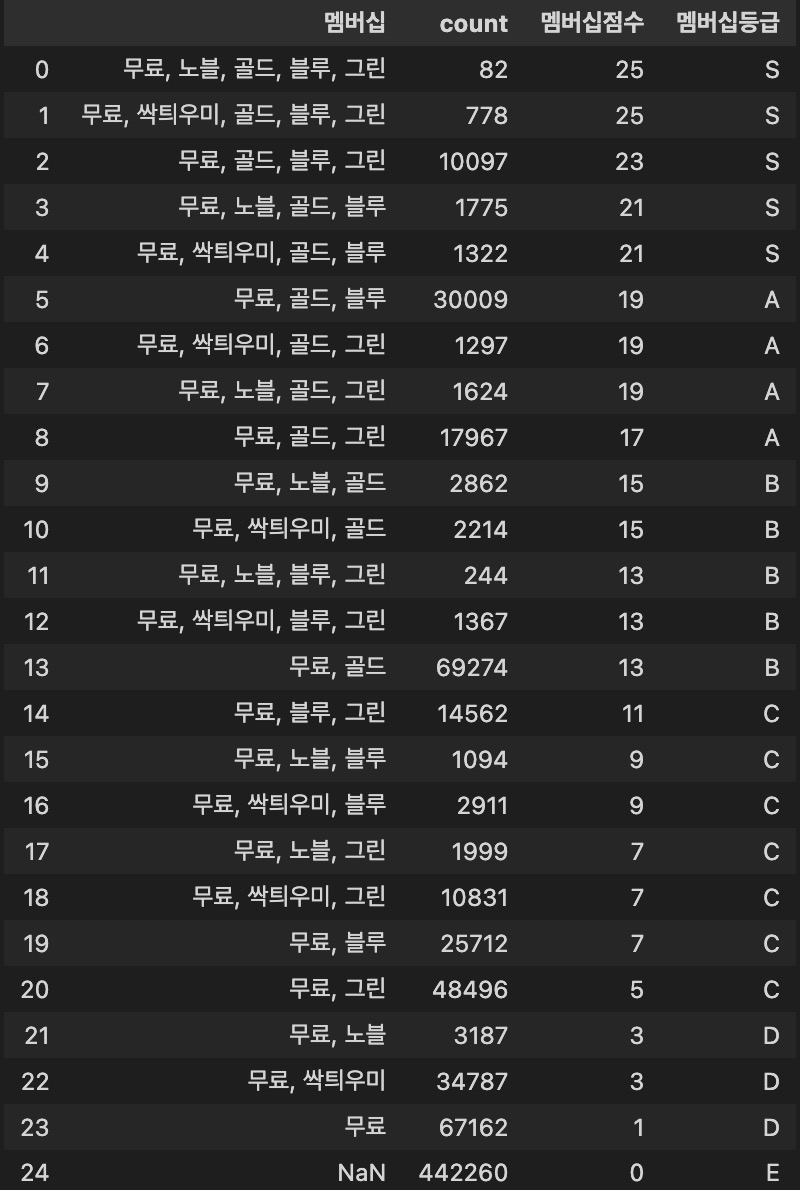

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/2023빅콘/data/prf_data3.csv')

In [ ]:
df.head(1)

,공연일자,공연시작시간,선예매여부,예매시작일,장르,휴게시간,공연명,내한여부,러닝타임,가격종류,R석,A석,요일,결제내역수,티켓판매량,전체좌석,일반예매율
0,2018-11-25,1700,1,20181029.0,클래식,15,김대진 피아노 독주회,0,1시간 50분,3,50000.0,20000.0,6,1818,1537,2505.0,0.613573


In [ ]:
membership = pd.read_csv('/content/drive/MyDrive/2023빅콘/data/final_data_membership.csv')

<ipython-input-5-fbf109ad7957>:1: DtypeWarning: Columns (18,21) have mixed types. Specify dtype option on import or set low_memory=False.
  membership = pd.read_csv('/content/drive/MyDrive/2023빅콘/data/final_data_membership.csv')


In [ ]:
membership.head(1)

,연령,성별,예매일자,예매시간,공연일자,공연시작시간,좌석,결제가격,취소여부,할인내역,...,노블,골드,블루,그린,층,블록,열,좌석번호,멤버십점수,멤버십등급
0,50.0,M,20220206,1615,2022-03-02,1930,1층 B블록12열 7,180000,0,일반,...,0,0,0,0,1,B,12,7,1,D


In [ ]:
membership.columns

Index(['연령', '성별', '예매일자', '예매시간', '공연일자', '공연시작시간', '좌석', '결제가격', '취소여부',
       '할인내역', '선예매시작일', '예매시작일', '장르', '휴게시간', '회원여부', '공연명', '내한여부', '출연진',
       '제작진', '러닝타임', '관람연령', '제작사', '가격종류', 'R석', 'S석', 'A석', '티켓판매량', '요일',
       '멤버십', '무료', '싹틔우미', '노블', '골드', '블루', '그린', '층', '블록', '열', '좌석번호',
       '멤버십점수', '멤버십등급'],
      dtype='object')

In [ ]:
len(membership)

793913

In [ ]:
# 남길 컬럼 정의
keep_cols = ['공연일자', '공연시작시간', '예매시작일', '장르', '휴게시간', '공연명', '내한여부', '러닝타임', 'R석', 'A석', '멤버십점수', '취소여부']

# 카운트할 컬럼을 정의
count_cols = ['공연일자', '공연시작시간', '예매시작일', '장르', '휴게시간', '공연명', '내한여부', '러닝타임', 'R석', 'A석']

## 멤버십점수 합산

In [ ]:
membership = membership[keep_cols]

membership.head(1)

,공연일자,공연시작시간,예매시작일,장르,휴게시간,공연명,내한여부,러닝타임,R석,A석,멤버십점수,취소여부
0,2022-03-02,1930,20220110.0,독주,0,"국립합창단 위대한 합창 Ⅰ, 칼 오르프 & 카르미나 부라나",0,1시간 10분,30000.0,10000.0,1,0


In [ ]:
# '취소여부'가 0인 행들을 카운트
grouped = membership[membership['취소여부'] == 0].groupby(count_cols)['멤버십점수'].sum().reset_index(name='멤버십합계')

In [ ]:
grouped.head(1)

,공연일자,공연시작시간,예매시작일,장르,휴게시간,공연명,내한여부,러닝타임,R석,A석,멤버십합계
0,2018-11-25,1700,20181029.0,클래식,15,김대진 피아노 독주회,0,1시간 50분,50000.0,20000.0,258


In [ ]:
len(grouped)

516

In [ ]:
len(df)

516

In [ ]:
# '취소여부' 칼럼 삭제
membership = membership.drop(columns=['취소여부'])

In [ ]:
# '티켓판매량' 칼럼을 제외한 컬럼들을 추출
join_cols = grouped.columns[grouped.columns != '멤버십합계'].tolist()

# left join 수행
df = pd.merge(df, grouped, on=join_cols, how='left')

In [ ]:
df.head(1)

,공연일자,공연시작시간,선예매여부,예매시작일,장르,휴게시간,공연명,내한여부,러닝타임,가격종류,R석,A석,요일,결제내역수,티켓판매량,전체좌석,일반예매율,멤버십합계
0,2018-11-25,1700,1,20181029.0,클래식,15,김대진 피아노 독주회,0,1시간 50분,3,50000.0,20000.0,6,1818,1537,2505.0,0.613573,258


In [ ]:
df.columns

Index(['공연일자', '공연시작시간', '선예매여부', '예매시작일', '장르', '휴게시간', '공연명', '내한여부', '러닝타임',
       '가격종류', 'R석', 'A석', '요일', '결제내역수', '티켓판매량', '전체좌석', '일반예매율', '멤버십합계'],
      dtype='object')

In [ ]:
df['가중예매율'] = df['멤버십합계']  / (df['전체좌석']*25)

In [ ]:
df['멤버십유입률'] = df['멤버십합계'] / (df['티켓판매량']*25)

In [ ]:
df.head()

,공연일자,공연시작시간,선예매여부,예매시작일,장르,휴게시간,공연명,내한여부,러닝타임,가격종류,R석,A석,요일,결제내역수,티켓판매량,전체좌석,일반예매율,멤버십합계,가중예매율,멤버십유입률
0,2018-11-25,1700,1,20181029.0,클래식,15,김대진 피아노 독주회,0,1시간 50분,3,50000.0,20000.0,6,1818,1537,2505.0,0.613573,258,0.004120,0.006714
1,2018-12-08,1700,0,20181029.0,클래식,20,제175회 국립합창단 정기연주회: 헨델의 메시아,0,2시간 20분,4,50000.0,10000.0,5,2463,2165,2505.0,0.864271,442,0.007058,0.008166
2,2018-12-20,2000,0,20181110.0,콘서트,20,파리나무십자가 소년합창단 크리스마스 콘서트 (12.20),1,2시간,4,100000.0,30000.0,3,3007,2207,2505.0,0.881038,0,0.000000,0.000000
3,2019-02-08,2000,1,20181220.0,교향곡,15,"대관령겨울음악제 실내악 갈라 콘서트, NOwhere: NOWhere",0,2시간 15분,3,50000.0,20000.0,4,1787,1551,2505.0,0.619162,1494,0.023856,0.038530
4,2019-02-16,1700,0,20181230.0,클래식,20,"곤지암 플루트 페스티벌: Hallo, Mozart",0,2시간,4,70000.0,20000.0,5,1361,1174,2505.0,0.468663,1593,0.025437,0.054276


In [ ]:
df[['일반예매율', '가중예매율', '멤버십유입률']]

,일반예매율,가중예매율,멤버십유입률
0,0.613573,0.004120,0.006714
1,0.864271,0.007058,0.008166
2,0.881038,0.000000,0.000000
3,0.619162,0.023856,0.038530
4,0.468663,0.025437,0.054276
...,...,...,...
511,1.000000,0.177613,0.163034
512,0.774850,0.114140,0.147306
513,0.468263,0.175713,0.375243
514,0.289820,0.087840,0.303085


In [ ]:
df['일반-가중'] = df['일반예매율'] - df['가중예매율']

In [ ]:
df['일반-유입'] = df['일반예매율'] - df['멤버십유입률']

In [ ]:
df[['일반예매율', '가중예매율', '멤버십유입률', '일반-가중', '일반-유입']].describe()

,일반예매율,가중예매율,멤버십유입률,일반-가중,일반-유입
count,516.000000,516.000000,516.000000,516.000000,516.000000
mean,0.500806,0.058849,0.152826,0.441957,0.347980
std,0.256707,0.060221,0.132574,0.264391,0.345249
min,0.009182,0.000000,0.000000,0.005749,-0.385662
25%,0.294112,0.012427,0.027870,0.227059,0.056931
50%,0.465269,0.040615,0.121561,0.383409,0.310776
75%,0.705190,0.087086,0.276815,0.650399,0.633365
max,1.000000,0.368623,0.441151,1.000000,1.000000


In [ ]:
df = df.drop(columns=['일반-가중', '일반-유입'])

In [ ]:
df.columns

Index(['공연일자', '공연시작시간', '선예매여부', '예매시작일', '장르', '휴게시간', '공연명', '내한여부', '러닝타임',
       '가격종류', 'R석', 'A석', '요일', '결제내역수', '티켓판매량', '전체좌석', '일반예매율', '멤버십합계',
       '가중예매율', '멤버십유입률'],
      dtype='object')

In [ ]:
len(df)

516

In [ ]:
df.to_csv('/content/drive/MyDrive/2023빅콘/data/prf_dataset.csv', index=False)